<a href="https://colab.research.google.com/github/rhuntsman/DeepLearning2025/blob/main/MultiLayerANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

# parameters
blur = 1
nPerCluster = 100

A = [1,1]
B = [5,1]

a = [A[0] + np.random.randn(nPerCluster)*blur, A[1] + np.random.randn(nPerCluster)*blur]
b = [B[0] + np.random.randn(nPerCluster)*blur, B[1] + np.random.randn(nPerCluster)*blur]

labels_np = np.vstack((np.zeros((nPerCluster,1)), np.ones((nPerCluster,1))))

data_np = np.hstack((a,b)).T

data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# show the data
#fig = plt.figure(figsize=(5,5))
#plt.plot(data[np.where(labels==0)[0],0], data[np.where(labels==0)[0],1], 'bs')
#plt.plot(data[np.where(labels==1)[0],0], data[np.where(labels==1)[0],1], 'ko')
#plt.title('Qwerties')
#plt.xlabel('Dimension 1')
#plt.ylabel('Dimension 2')
#plt.show()

# Create the model
#model, lossFunction, optimizer = ANNModel(0.1)

# Train the model
#losses, predictions, acc = TrainModel(model, data, labels, optimizer, nEpochs, lossFunction)

# Plot losses
#plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=0.1)
#plt.xlabel('Epoch'), plt.ylabel('Loss')
#plt.show()



<ipython-input-18-b961145fed84>:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [19]:
def ANNModel(learningRate=0.01):
  model = nn.Sequential(
      nn.Linear(2,1),
      nn.ReLU(),
      nn.Linear(1,1),
      #nn.Sigmoid(),
  )
  lossFunction = nn.BCEWithLogitsLoss()

  optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

  return model, lossFunction, optimizer

nEpochs = 1000

In [20]:
def TrainModel(model, data, labels, optimizer, nEpochs, lossFunction):
  # initialize losses
  losses = torch.zeros(nEpochs)

  for epoch_i in range(nEpochs):

    # compute predictions
    yHat = model(data)

    # compute losses
    loss = lossFunction(yHat, labels)
    losses[epoch_i] = loss

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # predict
    predictions = model(data)

    accuracy = 100*torch.mean(((predictions>0)==labels).float())

  return losses, predictions, accuracy

In [25]:
# Test different learning rates
learningRates = np.linspace(0.001, 0.1, 40)
accByLR = []
allLosses = np.zeros((len(learningRates), nEpochs))

# loop through learning rates
for i, lr in enumerate(learningRates):

  model, lossFunction, optimizer = ANNModel(lr)
  losses, predictions, acc = TrainModel(model, data, labels, optimizer, nEpochs, lossFunction)
  accByLR.append(acc)
  allLosses[i, :] = losses.detach()



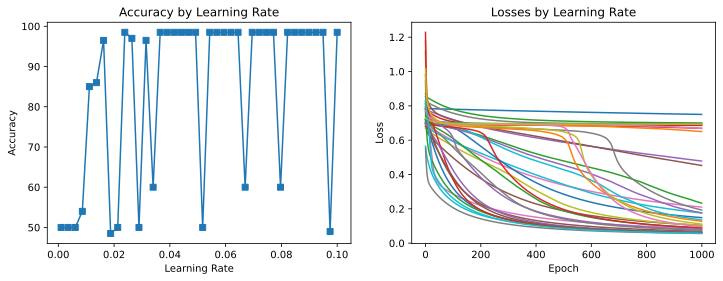

In [30]:
fig,ax = plt.subplots(1,2,figsize=(12,4))
ax[0].plot(learningRates,accByLR,'s-')
ax[0].set_title('Accuracy by Learning Rate')
ax[0].set_xlabel('Learning Rate')
ax[0].set_ylabel('Accuracy')

ax[1].plot(allLosses.T)
ax[1].set_title('Losses by Learning Rate')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
plt.show()

In [33]:
sum(torch.tensor(accByLR)>70)/len(accByLR)

tensor(0.7000)